In [596]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [597]:
data = pd.read_csv('CC.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [598]:
# see how many customers we have of each Tenure
data["TENURE"].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [599]:
#finding all the null values
null_values = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:25])
null_values.columns  = ['Null Count']
null_values.index.name  = 'Feature'
print(null_values)

                                  Null Count
Feature                                     
MINIMUM_PAYMENTS                         313
CREDIT_LIMIT                               1
TENURE                                     0
PURCHASES_FREQUENCY                        0
BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
ONEOFF_PURCHASES_FREQUENCY                 0
PRC_FULL_PAYMENT                           0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
PAYMENTS                                   0
CUST_ID                                    0


In [600]:
#assigning null values to mean 
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [601]:
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]
print(x.shape,y.shape)

(8950, 16) (8950,)


In [602]:
wcss=[]
#elbow method to know the number of clusters

In [603]:
for i in range(1,7):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [604]:
print(wcss)

[393060974446.53516, 279296826926.8282, 232803038853.80325, 206554539656.20233, 182427606729.4751, 161691648123.14597]


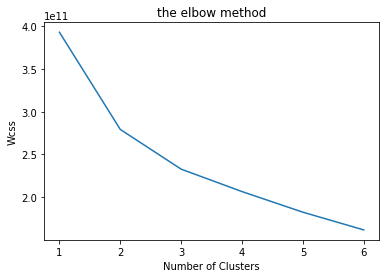

In [605]:
plt.plot(range(1,7),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [606]:
nclusters=3# this is the k in kmeans
seed =0
km =KMeans(n_clusters=nclusters, random_state=seed) 
km.fit(x)# predict the cluster for each data point
# predict the cluster for each data point
y_cluster_kmeans=km.predict(x)

In [607]:
silhouette_score = metrics.silhouette_score(x, y_cluster_kmeans)
print("silhouette score ",silhouette_score)

silhouette score  0.4661239342136798


In [608]:
scaler = StandardScaler()
scaler.fit(x)# Fit on training set only.
x_scaler= scaler.transform(x)# Apply transform to both the training set and the test set

In [609]:
km.fit(x_scaler)# predict the cluster for each data point
# predict the cluster for each data point
y_cluster_kmeans=km.predict(x_scaler)

In [610]:
After_score = metrics.silhouette_score(x_scaler, y_cluster_kmeans)
print("silhouette score after scaling ",After_score)

silhouette score after scaling  0.2672161762428284


In [611]:
#bonus
pca= PCA(3) 
x_pca = pca.fit_transform(x_scaler)

In [612]:
km.fit(x_pca)
y_cluster_kmeans= km.predict(x_pca)
PCA_score = metrics.silhouette_score(x_pca, y_cluster_kmeans)
print("silhouette score after applying PCA ",PCA_score)

silhouette score after applying PCA  0.38039932017920247


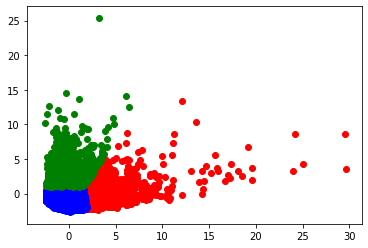

In [613]:
colors = ["red", "blue", "green"]
for i in range(3):
    x_axis = x_pca[y_cluster_kmeans == i][:,0]
    y_axis = x_pca[y_cluster_kmeans == i][:,1]
    plt.scatter(x_axis,y_axis,color=colors[i])